# Isodata
In this notebook we present a simple implementation of the classic ISODATA algorithm for clustering grey scale images into two intensity values. We use this to segment a picture of a blackboard.

In [99]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

In [100]:
def threshold_transform(image : np.ndarray, threshold : float) -> np.ndarray:
    image[ image <= threshold ] = 0
    image[ image != 0 ] = 1
    return image

We define the function on a grayscale image $f : \mathbb{R}^2 \to \mathbb{R}$
$$ \varphi(\theta) = \frac{1}{2}\left(\int_{f\leq\theta}\mathrm{d}x f(x) + \int_{f>\theta}\mathrm{d}x f(x) \right). $$
To segment this we need $\varphi(\theta) = \theta$, which we can obtain via a fixpoint iteration.

In [107]:
def phi(theta : float, histogram : tuple) -> float:
    hist, bins = histogram
    number_bins = bins.shape[0]-1
    theta = int(theta * number_bins)
    hist_s = hist * bins[1:]
    result = np.sum(hist_s[:theta+1]) / np.sum(hist[:theta+1])
    result += np.sum(hist_s[theta+1:]) / np.sum(hist[theta+1:])
    result /= 2
    return result

def isodata(image : np.ndarray , number_bins : int) -> np.ndarray:
    #normalize the image
    image = image.astype(float)
    image -= np.min(image)
    image /= np.max(image)
    #get histogram and bins
    histogram = np.histogram(image, bins = number_bins)
    #initialize theta
    theta = np.max(image) + np.min(image)
    theta /= 2
    theta_old = -1
    #fixpoint iteration
    while abs(theta - theta_old) > 0.005:
        theta_old = theta
        theta = phi(theta, histogram)
    return threshold_transform(image, theta)
    

    

In [108]:
tafel = np.array(imread('data/tafel_low.png'))
tafel
isodata_tafel = isodata(tafel,number_bins=100)


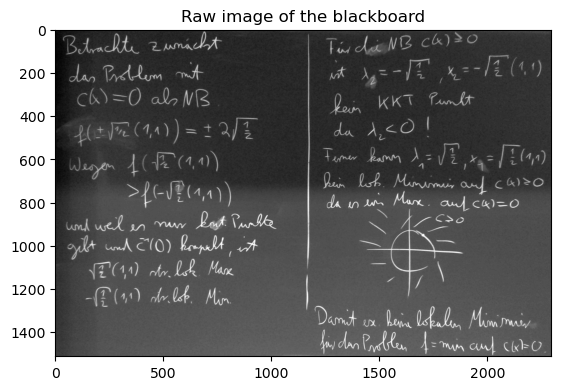

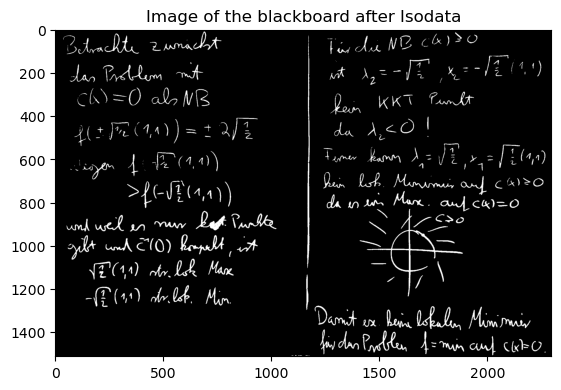

In [109]:
plt.imshow(tafel, cmap='gray')
plt.title('Raw image of the blackboard')
plt.show()
plt.imshow(isodata_tafel, cmap='gray')
plt.title('Image of the blackboard after Isodata')
plt.show()